## Introduction to Scikit-Learn(sklearn)
This Notebook demonstrate about function of scikit library
Things going to cover:
1. Scikit Learn work flow
2. Getting the Data Ready
3. Choose the right estimator or algorithm for the problem.
4. Fit the model /algorithm and use to make prediction on our data
5. Evaluating a model
6. Improve a model
7. Save and load trained model
8. And Put it all together

## Scikit Learn Work Flow

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline



In [30]:
# Get the data ready
import pandas as pd
heart_disease = pd.read_csv("heart-disease.csv")
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [31]:
# Create x feature matrix
x = heart_disease.drop("target",axis=1)
# Create y
y =heart_disease["target"]




In [32]:
# Choose the right model and hyperarameters
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
# Keep defauit parameters
clf.get_params()


{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [33]:
# Fit the model to Training Data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2)


In [34]:
clf.fit(x_train,y_train);

In [35]:
# make a prediction
y_pres = clf.predict(x_test)
y_pres

array([0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0], dtype=int64)

In [36]:
y_test

42     1
291    0
15     1
51     1
265    0
      ..
18     1
247    0
126    1
131    1
176    0
Name: target, Length: 61, dtype: int64

In [37]:
# evaluate th model in training data and test data
clf.score(x_train,y_train)



1.0

In [38]:
clf.score(x_test,y_test)

0.7704918032786885

In [39]:
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
print(classification_report(y_test,y_pres))

              precision    recall  f1-score   support

           0       0.63      0.81      0.71        21
           1       0.88      0.75      0.81        40

    accuracy                           0.77        61
   macro avg       0.76      0.78      0.76        61
weighted avg       0.80      0.77      0.78        61



In [40]:
confusion_matrix(y_test,y_pres)

array([[17,  4],
       [10, 30]], dtype=int64)

In [41]:
accuracy_score(y_test,y_pres)

0.7704918032786885

In [42]:
# improvw model 
# try different types of n_estimator
np.random.seed(42)
for i in range(10,100,10):
    print(f"Trying model with {i}estimator")
    clf = RandomForestClassifier(n_estimators=i).fit(x_train,y_train)
    print(f"Model accuracy on test set:{clf.score(x_test,y_test)* 100:.2f}%")
    print("")
    



Trying model with 10estimator
Model accuracy on test set:80.33%

Trying model with 20estimator
Model accuracy on test set:80.33%

Trying model with 30estimator
Model accuracy on test set:78.69%

Trying model with 40estimator
Model accuracy on test set:78.69%

Trying model with 50estimator
Model accuracy on test set:77.05%

Trying model with 60estimator
Model accuracy on test set:77.05%

Trying model with 70estimator
Model accuracy on test set:80.33%

Trying model with 80estimator
Model accuracy on test set:81.97%

Trying model with 90estimator
Model accuracy on test set:80.33%



In [43]:
# save a model and load it
import pickle
pickle.dump(clf,open("random_forest_model_1.pkl","wb"))

In [44]:
loaded_model = pickle.load(open("random_forest_model_1.pkl","rb"))
loaded_model.score(x_test,y_test)                                
                                
                                

0.8032786885245902

## Getting our data ready to use in machine learning model
Three main things 
1. Split the data into labels and features (x and y)
2. Filling and Disregarding missing values
3. Converting non-numerical values into numerical values (feature-encoding)

In [45]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [46]:
x =heart_disease.drop("target",axis=1)
x.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [47]:
y = heart_disease["target"]
y.head()


0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [48]:
# split the data into training and test sets
from sklearn.model_selection import train_test_split
x_train ,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [49]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((242, 13), (61, 13), (242,), (61,))

## Make Sure it's all numerical

In [50]:
car_sales = pd.read_csv("data/car-sales-extended.csv")
car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043


In [51]:
len(car_sales)

1000

In [52]:
car_sales.dtypes

Make             object
Colour           object
Odometer (KM)     int64
Doors             int64
Price             int64
dtype: object

In [53]:
# SPlit into x/y
x = car_sales.drop("Price",axis=1)
y = car_sales["Price"]
# Split into training and test


In [54]:
x_train, x_test, y_train ,y_test = train_test_split(x,y,test_size=0.2)

In [55]:
# building machine learning model
from sklearn.ensemble import RandomForestRegressor
model  = RandomForestRegressor()
model.fit(x_train,y_train)
model.score(x_test,y_test)

ValueError: could not convert string to float: 'Toyota'

In [56]:
# Turining categories in number
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [57]:
categorical_features  = ["Make","Colour","Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                 one_hot,
                                 categorical_features
                                 )],
                               remainder= "passthrough")

In [58]:
tarnsformed_x = transformer.fit_transform(x)
tarnsformed_x

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]])

In [59]:
x

,Make,Colour,Odometer (KM),Doors
0,Honda,White,35431,4
1,BMW,Blue,192714,5
2,Honda,White,84714,4
3,Toyota,White,154365,4
4,Nissan,Blue,181577,3
...,...,...,...,...
995,Toyota,Black,35820,4
996,Nissan,White,155144,3
997,Nissan,Blue,66604,4
998,Honda,White,215883,4


In [60]:
pd.DataFrame(tarnsformed_x)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0
996,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,155144.0
997,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0
998,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,215883.0


In [61]:
dummy  = pd.get_dummies(car_sales[["Make","Colour","Doors"]])
dummy

,Doors,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White
0,4,0,1,0,0,0,0,0,0,1
1,5,1,0,0,0,0,1,0,0,0
2,4,0,1,0,0,0,0,0,0,1
3,4,0,0,0,1,0,0,0,0,1
4,3,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
995,4,0,0,0,1,1,0,0,0,0
996,3,0,0,1,0,0,0,0,0,1
997,4,0,0,1,0,0,1,0,0,0
998,4,0,1,0,0,0,0,0,0,1


In [62]:
# refit the model
np.random.seed(42)
x_train ,x_test, y_train,y_test = train_test_split(tarnsformed_x,y,test_size=0.2)
model.fit(x_train,y_train)


RandomForestRegressor()

In [63]:
model.score(x_test,y_test)

0.3235867221569877

### what if there were missing value
1. Fill them with value
2. Remove the sample with missing data altogether

In [64]:
car_sales_missing_ = pd.read_csv("data/car-sales-extended-missing-data.csv")
car_sales_missing_.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [65]:
car_sales_missing_.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [66]:
# create x and y
x = car_sales_missing_.drop("Price",axis=1)
y = car_sales_missing_["Price"]

In [67]:
# convert data into number
# Turining categories in number
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
categorical_features  = ["Make","Colour","Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                 one_hot,
                                 categorical_features
                                 )],
                               remainder= "passthrough")
tarnsformed_x = transformer.fit_transform(x)
tarnsformed_x

<1000x16 sparse matrix of type '<class 'numpy.float64'>'
	with 4000 stored elements in Compressed Sparse Row format>

### Option 1 Fill missing data by panda

In [68]:
car_sales_missing_["Doors"].value_counts()

4.0    811
5.0     75
3.0     64
Name: Doors, dtype: int64

In [69]:
# Fill the make column
car_sales_missing_["Make"].fillna("missing",inplace=True)
# Fill the colour column
car_sales_missing_["Colour"].fillna("missing",inplace= True)
# Fill the Odometer (KM) column
car_sales_missing_["Odometer (KM)"].fillna(car_sales_missing_["Odometer (KM)"].mean(),inplace=True)
# Fill the Doors column
car_sales_missing_["Doors"].fillna(4, inplace  = True)

In [70]:
car_sales_missing_.isna().sum()

Make              0
Colour            0
Odometer (KM)     0
Doors             0
Price            50
dtype: int64

In [71]:
# Remove rows with missing "Price" value
car_sales_missing_.dropna(inplace=True)

In [72]:
car_sales_missing_.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

In [73]:
x = car_sales_missing_.drop("Price",axis=1)
y = car_sales_missing_["Price"]

In [74]:
# convert data into number
# Turining categories in number
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
categorical_features  = ["Make","Colour","Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                 one_hot,
                                 categorical_features
                                 )],
                               remainder= "passthrough")
tarnsformed_x = transformer.fit_transform(car_sales_missing_)
tarnsformed_x

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        3.54310e+04, 1.53230e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        1.92714e+05, 1.99430e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        8.47140e+04, 2.83430e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 0.00000e+00,
        6.66040e+04, 3.15700e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.15883e+05, 4.00100e+03],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.48360e+05, 1.27320e+04]])

## Option 2. Fill missing value by SCikit-Learn

In [75]:
car_sales_miss_value = pd.read_csv("data/car-sales-extended-missing-data.csv")
car_sales_miss_value.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [76]:
car_sales_miss_value.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [77]:
# drop  the rows with no label
car_sales_miss_value.dropna(subset=["Price"],inplace= True)
car_sales_miss_value.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [78]:
# Split into  x and y
x = car_sales_miss_value.drop("Price",axis=1)
y = car_sales_miss_value["Price"]

In [79]:
x.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
dtype: int64

In [80]:
# Fill missing value with Scikit-Learn
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
# fill name values with missing and numerical values with mean
cate_imputer = SimpleImputer(strategy="constant",fill_value= "missing")
door_imputer =SimpleImputer(strategy="constant",fill_value=4)
num_imputer =SimpleImputer(strategy="mean")
#Define columns
cat_names = ["Make","Colour"]
door_names = ["Doors"]
num_names = ["Odometer (KM)"]
# Create imputer something the fill missing data
imputer = ColumnTransformer([
    ("cate_imputer",cate_imputer,cat_names),
    ("door_imputer",door_imputer,door_names),
    ("num_imputer",num_imputer,num_names)
])
# Transform the data
filled_x  = imputer.fit_transform(x)
filled_x

array([['Honda', 'White', 4.0, 35431.0],
       ['BMW', 'Blue', 5.0, 192714.0],
       ['Honda', 'White', 4.0, 84714.0],
       ...,
       ['Nissan', 'Blue', 4.0, 66604.0],
       ['Honda', 'White', 4.0, 215883.0],
       ['Toyota', 'Blue', 4.0, 248360.0]], dtype=object)

In [81]:
car_sales_filled = pd.DataFrame(filled_x,columns=["Make","Colour","Doors","Odometer (KM)"])
car_sales_filled.head()

,Make,Colour,Doors,Odometer (KM)
0,Honda,White,4.0,35431.0
1,BMW,Blue,5.0,192714.0
2,Honda,White,4.0,84714.0
3,Toyota,White,4.0,154365.0
4,Nissan,Blue,3.0,181577.0


In [82]:
car_sales_filled.isna().sum()

Make             0
Colour           0
Doors            0
Odometer (KM)    0
dtype: int64

In [83]:
car_sales_filled

,Make,Colour,Doors,Odometer (KM)
0,Honda,White,4.0,35431.0
1,BMW,Blue,5.0,192714.0
2,Honda,White,4.0,84714.0
3,Toyota,White,4.0,154365.0
4,Nissan,Blue,3.0,181577.0
...,...,...,...,...
945,Toyota,Black,4.0,35820.0
946,missing,White,3.0,155144.0
947,Nissan,Blue,4.0,66604.0
948,Honda,White,4.0,215883.0


In [84]:
# convert data into number
# Turining categories in number
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
categorical_features  = ["Make","Colour","Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                 one_hot,
                                 categorical_features
                                 )],
                               remainder= "passthrough")
tarnsformed_x = transformer.fit_transform(car_sales_filled)
tarnsformed_x

<950x15 sparse matrix of type '<class 'numpy.float64'>'
	with 3800 stored elements in Compressed Sparse Row format>

In [85]:
# got datas as number and filled missing values
# fit the model
np.random.seed(42)
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
x_train ,x_test ,y_train ,y_test = train_test_split(tarnsformed_x,y,test_size=0.2)
model = RandomForestRegressor()
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.21990196728583944

## 2. Choosing the right estimator /algorithm for our problwm
* Scikit learn refers machine learning model , algorithm  as estimator
* We will use clf as classify estimator
* Regression predicting problem ( selling price of a car)

## * Picking a machine learning problem for regression problem

In [86]:
# Get California Data Set
from sklearn.datasets import fetch_california_housing
housing  = fetch_california_housing()
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [87]:
housing_df = pd.DataFrame(housing["data"],columns=housing["feature_names"])
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [88]:
housing_df["target"] = housing["target"]
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [89]:
housing_df = housing_df.drop("MedHouseVal", axis= 1)
housing_df

KeyError: "['MedHouseVal'] not found in axis"

In [ ]:
# import algorithm 
from sklearn.linear_model import Ridge
# set up random seed
np.random.seed(42)
# Create the data 
x = housing_df.drop("target",axis= 1)
y = housing_df["target"]
#split into train and tests sets
x_train ,x_test ,y_train,y_test = train_test_split(x, y, test_size=0.2)
# fit the model
model = Ridge()
model.fit(x_train,y_train)
# check score
model.score(x_test, y_test)

In [90]:
# import randomforestregressor model class from ensembles modules
from sklearn.ensemble import RandomForestRegressor
# set up Random seed
np.random.seed(42)
# create the data
x =housing_df.drop("target",axis=1)
y = housing_df["target"]
# split into train and test set
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)
# create randomforestmodel
model = RandomForestRegressor()
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.8065734772187598

## Picking a machine learning model for a classification model

In [91]:
heart_disease = pd.read_csv("heart-disease.csv")
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [92]:
#  import LinearSVc estimator class
from sklearn.svm import LinearSVC
# Set up random seed
np.random.seed(42)
# Make the data
x = heart_disease.drop("target",axis=1)
y = heart_disease["target"]
 
# split the data
x_train ,x_test,y_train,y_test = train_test_split (x,y, test_size=0.2)
# instansiate linearSVC
clf = LinearSVC()
clf.fit(x_train,y_train)
# Evaluate the linear SVC
clf.score(x_test,y_test)

C:\Users\sajid_f57ovgd\Desktop\kaggle\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.8688524590163934

In [93]:
#  import RandomForestClassifier class
from sklearn.ensemble import RandomForestClassifier
# Set up random seed
np.random.seed(42)
# Make the data
x = heart_disease.drop("target",axis=1)
y = heart_disease["target"]
 
# split the data
x_train ,x_test,y_train,y_test = train_test_split (x,y, test_size=0.2)
# instansiate rANDOM fOREST classifier
clf = RandomForestClassifier()
clf.fit(x_train,y_train)
# Evaluate the RandomforestClassfier
clf.score(x_test,y_test)

0.8524590163934426

## 3. Fit the model / algorithm in data and use to make prediction
### Fitting the model

In [94]:
#  import RandomForestClassifier class
from sklearn.ensemble import RandomForestClassifier
# Set up random seed
np.random.seed(42)
# Make the data
x = heart_disease.drop("target",axis=1)
y = heart_disease["target"]
 
# split the data
x_train ,x_test,y_train,y_test = train_test_split (x,y, test_size=0.2)
# instansiate rANDOM fOREST classifier
clf = RandomForestClassifier()
# fit the model to data
clf.fit(x_train,y_train)
# Evaluate the RandomforestClassfier
clf.score(x_test,y_test)

0.8524590163934426

### MAke prediction with machinelearning model
Two way to make prediction
* `predict()`
* `predict_proba`

In [95]:
x_test.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
179,57,1,0,150,276,0,0,112,1,0.6,1,1,1
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3
111,57,1,2,150,126,1,1,173,0,0.2,2,1,3
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2


In [96]:
# Use a train model to make prediction
clf.predict(x_test)

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [97]:
np.array([y_test])

array([[0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
        0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0]], dtype=int64)

In [98]:
# Compare predicton to truth labels to evaluate the models
y_predic = clf.predict(x_test)
np.mean(y_predic == y_test)

0.8524590163934426

In [99]:
clf.score(x_test,y_test)

0.8524590163934426

In [100]:
# another way
from sklearn.metrics import accuracy_score
accuracy_score(y_predic,y_test)

0.8524590163934426

##`predic` can also be use for regression model



In [101]:
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [102]:
from sklearn.ensemble import RandomForestRegressor
np.random.seed(42)
#Create the data
x = housing_df.drop("target",axis=1)
y = housing_df["target"]
# split into training  and test sets
x_train ,x_test, y_train,y_test = train_test_split(x, y, test_size=0.2)
# Create model instance 
model  = RandomForestRegressor()
# fit the model 
model.fit(x_train,y_train)
# Make predict 
y_predict = model.predict(x_test)
y_predict[:10]
    

array([0.49384  , 0.75494  , 4.9285964, 2.54316  , 2.33176  , 1.6525301,
       2.34323  , 1.66182  , 2.47489  , 4.8344779])

In [103]:
np.array(y_test[:10])


array([0.477  , 0.458  , 5.00001, 2.186  , 2.78   , 1.587  , 1.982  ,
       1.575  , 3.4    , 4.466  ])

In [104]:
# compare the prediction to the truth
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test,y_predict)

0.32659871732073664

## EValuating Machine Learning Model
# 3 ways to evaluate models with SCikit-Learn
1. Estimator's build in score() method
2.The scoring parameters
3. Problem specific metric function

In [105]:
# Evaluating model with score() method
from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)

In [106]:
# Make the data
x = heart_disease.drop("target",axis=1)
y = heart_disease["target"]
 
# split the data
x_train ,x_test,y_train,y_test = train_test_split (x,y, test_size=0.2)
# instansiate rANDOM fOREST classifier
clf = RandomForestClassifier()
# fit the model
clf.fit(x_train,y_train)

RandomForestClassifier()

In [107]:
clf.score(x_train,y_train
         )

1.0

In [108]:
clf.score(x_test,y_test)

0.8524590163934426

In [109]:
from sklearn.ensemble import RandomForestRegressor
np.random.seed(42)
#Create the data
x = housing_df.drop("target",axis=1)
y = housing_df["target"]
# split into training  and test sets
x_train ,x_test, y_train,y_test = train_test_split(x, y, test_size=0.2)
# Create model instance 
model  = RandomForestRegressor(n_estimators=100)
# fit the model 
model.fit(x_train,y_train)


RandomForestRegressor()

In [110]:
model.score(x_test,y_test)

0.8065734772187598

In [111]:
model.score(x_test,y_test)

0.8065734772187598

In [112]:
# Evaluate a model with scoring parameter
from sklearn.model_selection import cross_val_score

In [113]:
# Evaluating model with score() method
from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)
# Make the data
x = heart_disease.drop("target",axis=1)
y = heart_disease["target"]
 
# split the data
x_train ,x_test,y_train,y_test = train_test_split (x,y, test_size=0.2)
# instansiate rANDOM fOREST classifier
clf = RandomForestClassifier()
# fit the model
clf.fit(x_train,y_train)

RandomForestClassifier()

In [114]:
clf.score(x_test,y_test)

0.8524590163934426

In [115]:
cross_val_score(clf,x,y,cv=5)

array([0.81967213, 0.86885246, 0.81967213, 0.78333333, 0.76666667])

In [116]:
np.random.seed(42)
# single training and test split score
single_clf_score = clf.score(x_test,y_test)
# take  the mean of 5 cross validation score
cross_vali_score_clf = np.mean(cross_val_score(clf,x,y,cv=5))
# compare two
single_clf_score ,cross_vali_score_clf

(0.8524590163934426, 0.8248087431693989)

In [117]:
# default scoring parameter of classifier mean accuracy
clf.score()

TypeError: score() missing 2 required positional arguments: 'X' and 'y'

In [118]:
cross_val_score(clf,x,y,cv= 5,scoring = None)

array([0.78688525, 0.86885246, 0.80327869, 0.78333333, 0.76666667])

### Classification Model evaluation metris
1. Accuracy
2.Area under Roc Curve
3.Confusion Matrix
4.Classification Report

## accuracy

In [119]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier


np.random.seed(42)

x = heart_disease.drop("target",axis =1)
y = heart_disease["target"]
    
clf = RandomForestClassifier()
cross_valscore= cross_val_score(clf,x,y, cv =5)

In [120]:
np.mean(cross_valscore)

0.8248087431693989

In [121]:
print(f"Heart DIsease Cross Validated Accuracy:{np.mean(cross_valscore)*100:.2f}")

Heart DIsease Cross Validated Accuracy:82.48


## area under Roc cuirve

In [122]:
# Create x test....etc
x_train, x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)



In [123]:
from sklearn.metrics import roc_curve
clf.fit(x_train,y_train)
#Make prediction
y_probs = clf.predict_proba(x_test)
y_probs[:10]


array([[0.51, 0.49],
       [0.17, 0.83],
       [0.51, 0.49],
       [0.72, 0.28],
       [0.43, 0.57],
       [0.12, 0.88],
       [0.3 , 0.7 ],
       [0.97, 0.03],
       [0.15, 0.85],
       [0.4 , 0.6 ]])

In [124]:
Y_pros_positive  = y_probs[:,1]
Y_pros_positive[:10]

array([0.49, 0.83, 0.49, 0.28, 0.57, 0.88, 0.7 , 0.03, 0.85, 0.6 ])

In [125]:
fpr, tpr, thresholds  = roc_curve(y_test,Y_pros_positive)

In [126]:
fpr

array([0.        , 0.03448276, 0.03448276, 0.03448276, 0.03448276,
       0.03448276, 0.03448276, 0.06896552, 0.06896552, 0.06896552,
       0.10344828, 0.10344828, 0.13793103, 0.13793103, 0.13793103,
       0.20689655, 0.20689655, 0.20689655, 0.27586207, 0.37931034,
       0.37931034, 0.48275862, 0.48275862, 0.55172414, 0.55172414,
       1.        ])

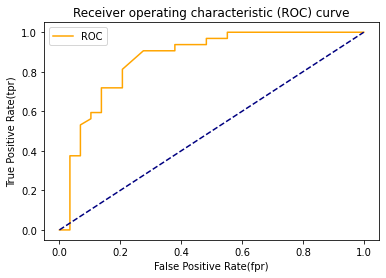

In [127]:
# Creating a function for plotting ROC curve
import matplotlib.pyplot as plt
def plot_roc_curve(fpr,tpr):
    
    #plot ROC curve
    plt.plot(fpr,tpr, color="orange",label="ROC")
    #plot line with no predictive power
    plt.plot([0, 1], [0, 1], color="navy", linestyle="--")
    #customize the plot
    plt.xlabel("False Positive Rate(fpr)")
    plt.ylabel("True Positive Rate(tpr)")
    plt.title("Receiver operating characteristic (ROC) curve")
    plt.legend() 
    plt.show()
    
plot_roc_curve(fpr,tpr)   
    

In [128]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,Y_pros_positive)

0.8669181034482759

## Confusion Matrix

In [129]:
from sklearn.metrics import confusion_matrix
y_preda = clf.predict(x_test)
confusion_matrix(y_preda,y_test)

array([[23,  6],
       [ 6, 26]], dtype=int64)

In [130]:
# visualize confusion matrix with pd.crosstab()
pd.crosstab(y_test,
           y_preda,
           rownames= ["Actual Labels"],
           colnames=["Predicted labels"])

Predicted labels,0,1
Actual Labels,,
0,23,6
1,6,26


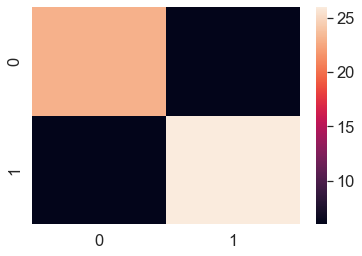

In [131]:
# Make your confusion matrix visual  with seaborn heatmap()

import seaborn as sns
#set the font scale
sns.set(font_scale= 1.5)
confs_mat = confusion_matrix(y_test,y_preda)
# plot using heatmap()
sns.heatmap(confs_mat);

In [132]:
import sklearn
sklearn.__version__

'1.0.2'

In [133]:
clf

RandomForestClassifier()

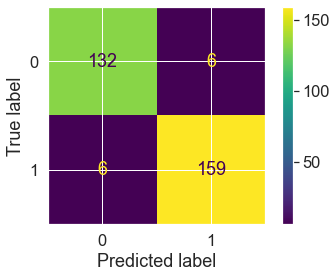

In [134]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(estimator=clf,X=x,y=y);

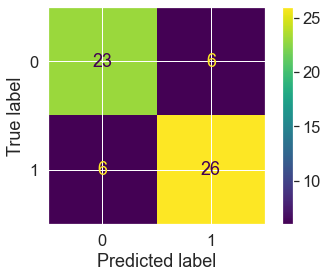

In [135]:
ConfusionMatrixDisplay.from_predictions(y_test,y_preda)

## Classification Report

In [136]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_preda))

              precision    recall  f1-score   support

           0       0.79      0.79      0.79        29
           1       0.81      0.81      0.81        32

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.80      0.80      0.80        61



In [137]:
## where precision recall become valuable
disease_true = np.zeros(10000)
disease_true[0]=1 #one positevcase
disease_preds =np.zeros(10000)
pd.DataFrame(classification_report(disease_true,disease_preds,output_dict=True))

C:\Users\sajid_f57ovgd\Desktop\kaggle\env\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sajid_f57ovgd\Desktop\kaggle\env\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sajid_f57ovgd\Desktop\kaggle\env\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.99990,0.0,0.9999,0.499950,0.99980
recall,1.00000,0.0,0.9999,0.500000,0.99990
f1-score,0.99995,0.0,0.9999,0.499975,0.99985
support,9999.00000,1.0,0.9999,10000.000000,10000.00000


### Regression Model evaluation Metrics

## we are going to cover 
1. R^2 (pronounced R square)
2. Mean absolute error (MAE)
3. Mean squared Error (MSE)

In [138]:
from sklearn.ensemble import RandomForestRegressor
np.random.seed(42)

x = housing_df.drop("target",axis=1)
y = housing_df["target"]

x_train ,x_test, y_train,y_test = train_test_split(x, y,test_size= 0.2)

model =RandomForestRegressor()
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.8065734772187598

In [139]:
from sklearn.metrics import r2_score
y_test_mean = np.full(len(y_test), y_test.mean())
y_test_mean[:10]

array([2.0550031, 2.0550031, 2.0550031, 2.0550031, 2.0550031, 2.0550031,
       2.0550031, 2.0550031, 2.0550031, 2.0550031])

In [140]:
r2_score(y_true= y_test, y_pred= y_test_mean)

0.0

## Mean abosulute error

In [141]:
from sklearn.metrics import mean_absolute_error
y_preds = model.predict(x_test)
mae = mean_absolute_error(y_test, y_preds)
mae

0.32659871732073664

In [142]:
df  = pd.DataFrame(data={"actual values":y_test,
                        "predicted values": y_preds})
df["Difference"] = df["predicted values"] - df["actual values"]
df.head()

,actual values,predicted values,Difference
20046,0.47700,0.493840,0.016840
3024,0.45800,0.754940,0.296940
15663,5.00001,4.928596,-0.071414
20484,2.18600,2.543160,0.357160
9814,2.78000,2.331760,-0.448240


In [143]:
np.abs(df["Difference"]).mean()

0.32659871732073803

## Mean square Error

In [144]:
from sklearn.metrics import mean_squared_error
y_preds = model.predict(x_test)
mae = mean_squared_error(y_test, y_preds)
mae

0.2534678520824551

In [145]:
df[" square differnce"] = np.square(df["Difference"])
df.head()

,actual values,predicted values,Difference,square differnce
20046,0.47700,0.493840,0.016840,0.000284
3024,0.45800,0.754940,0.296940,0.088173
15663,5.00001,4.928596,-0.071414,0.005100
20484,2.18600,2.543160,0.357160,0.127563
9814,2.78000,2.331760,-0.448240,0.200919


## Finally using `scorng` parameter

In [146]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)
 
x  = heart_disease.drop("target" ,axis= 1)
y  = heart_disease["target"]
clf = RandomForestClassifier(n_estimators=100)

In [147]:
np.random.seed(42)
# cross validation accuracy
cross_val = cross_val_score(clf, x, y, cv=5,scoring= None)
cross_val

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [148]:
print(f"Cross validated accuracy is {np.mean(cross_val)*100:.2f}")

Cross validated accuracy is 82.48


In [149]:
np.random.seed(42)
# cross validation accuracy
cross_val = cross_val_score(clf, x, y, cv=5,scoring= "accuracy")
cross_val

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [150]:
print(f"Cross validated accuracy is {np.mean(cross_val)*100:.2f}")

Cross validated accuracy is 82.48


In [151]:
#precision
np.random.seed(42)
cv_precision  = cross_val_score(clf,x,y, cv=5,scoring= "precision") 
cv_precision
    
    

array([0.82352941, 0.93548387, 0.84848485, 0.79411765, 0.76315789])

In [152]:
print(f"Cross validated precision is {np.mean(cv_precision)*100:.2f}")

Cross validated precision is 83.30


In [153]:
#Recall
np.random.seed(42)

cross_recall = cross_val_score(clf, x, y, cv=5,scoring= "recall")
cross_recall

array([0.84848485, 0.87878788, 0.84848485, 0.81818182, 0.87878788])

In [154]:
print(f"Cross validated recall is {np.mean(cross_recall)*100:.2f}")

Cross validated recall is 85.45


In [155]:
# lets see scoring parameter using for regression problem
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
np.random.seed(42)

x  = housing_df.drop("target" ,axis= 1)
y  = housing_df["target"]
model = RandomForestRegressor(n_estimators=100)


In [156]:
np.random.seed(42)
cv_r2 = cross_val_score(model,x,y,cv=3,scoring=None)    
np.mean(cv_r2)

0.6545458023124507

In [157]:
cv_r2

array([0.62156985, 0.72075819, 0.62130937])

In [158]:
# mean absolute error
cv_mae  = cross_val_score(model,x,y,cv=3,scoring="neg_mean_squared_error") 
np.mean(cv_mae)

-0.4626304189468596

In [159]:
#mean square error
cv_mse = cross_val_score(model,x,y,cv=3,scoring="neg_mean_absolute_error") 
np.mean(cv_mse)

-0.4820330437306202

## Using different evalutation metrics as sciki learn function

In [160]:
from sklearn.metrics import accuracy_score ,precision_score ,recall_score , f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
np.random.seed(42)
# Create x and y
x  = heart_disease.drop("target", axis  = 1)
y = heart_disease["target"]
#Split data
x_train, x_test , y_train, y_test = train_test_split(x,y,test_size= 0.2)

# Create model
clf  = RandomForestClassifier()

#Fit model

clf.fit(x_train, y_train)
#prediction
y_pred = clf.predict(x_test)
# Evaluate model using evaluate function
print( "Classification Metrics on test set")

print(f"accuracy:{accuracy_score(y_test,y_pred)*100:.2f}")
print(f"PRECISION:{precision_score(y_test,y_pred)*100:.2f}")
print(f"recall_score:{recall_score(y_test,y_pred)*100:.2f}")
print(f"f1_score:{f1_score(y_test,y_pred)*100:.2f}")





Classification Metrics on test set
accuracy:85.25
PRECISION:84.85
recall_score:87.50
f1_score:86.15


In [161]:
from sklearn.metrics import r2_score , mean_absolute_error,mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
np.random.seed(42)
# Create x and y
x = housing_df.drop("target",axis =1)
y = housing_df["target"]
#Split data
x_train, x_test , y_train, y_test = train_test_split(x,y,test_size= 0.2)

# Create model
clf  =RandomForestRegressor

#Fit model

model.fit(x_train,y_train)
#prediction
y_preds = model.predict(x_test)
# Evaluate model using evaluate function

print("Regression metrics on test set")

print(f"r2:{r2_score(y_test,y_preds)*100:.2f}")
print(f"MAE:{mean_absolute_error(y_test,y_preds)*100:.2f}")
print(f"MSE:{mean_squared_error(y_test,y_preds)*100:.2f}")




Regression metrics on test set
r2:80.66
MAE:32.66
MSE:25.35


## Improving model
#3 way to adjust hyperparameters
1. By Hand
2. By Randomly with Randomsearch Cv
3. Exchaustively with grid search

In [162]:
from sklearn.ensemble import RandomForestClassifier 

clf = RandomForestClassifier()
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

### Tuning Hyperparameter by Hands
Lets make 3 sets : Training ,Validation, Test
We are going to try and adjust
* max_depth
* max_features
* min_simple_leaf
* min_sample_splt
* n_estimator

In [275]:
def evaluate_preds(y_true , y_Preds):
    accuracy = accuracy_score(y_true ,y_Preds)
    precision = precision_score(y_true, y_Preds)
    recall = recall_score(y_true, y_Preds )
    f1 = f1_score(y_true, y_Preds)
    metric_dic = {"accuracy":round(accuracy,2),
                  "precision": round(precision,2),
                  "recall": round(recall,2),
                  "f1": round(f1 ,2) } 
    print(f"Acc:{accuracy * 100:.2f}%")
    print(f"precision:{precision:.2f}")
    print(f"recall:{recall:.2f}")
    print(f"f1:{f1:.2f}")

    return metric_dic
    
    


In [276]:
from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)
# Shuffle the data 
heart_disease_shuffled = heart_disease.sample(frac=1)
# Split into X and Y
X  = heart_disease_shuffled.drop("target",axis =1)
y = heart_disease_shuffled["target"]
# Split the data into train ,validation and test
train_split = round(0.7 * len(heart_disease_shuffled)) # 70% of Data
valid_split = round(train_split + 0.15 * len(heart_disease_shuffled)) # 15% of data
X_train ,y_train = X[:train_split], y[:train_split]
X_valid , y_valid = X[train_split: valid_split], y[train_split: valid_split]
X_test , y_test = X[valid_split:], y[valid_split:]                    
len(X_train), len(X_valid),len(X_test)                    

clf = RandomForestClassifier()
clf.fit(X_train,y_train)
# Make baseline prediction
y_preds = clf.predict(X_valid)
# evaluate the classifier in validation test
baseline_metrics  = evaluate_preds(y_valid,y_preds)
baseline_metrics

Acc:82.22%
precision:0.81
recall:0.88
f1:0.85


{'accuracy': 0.82, 'precision': 0.81, 'recall': 0.88, 'f1': 0.85}

In [277]:
np.random.seed(42)
# Create a second Classifier with hyperparameter
clf_2 = RandomForestClassifier(n_estimators=100)
clf_2.fit(X_train,y_train)
# Make prediction with different hyperparameter
y_pres_2  = clf_2.predict(X_valid)
# Evaluate the second classifier
clf_2_metrics = evaluate_preds(y_valid,y_pres_2)

Acc:82.22%
precision:0.84
recall:0.84
f1:0.84


In [278]:
from sklearn.model_selection import RandomizedSearchCV

grid = {"n_estimators":[10,100,200,500,1000,1200],
        "max_depth": [None, 5,10,20,30],
        "max_features":["auto","sqrt"],
        "min_samples_split": [2,4,6],
        "min_samples_leaf": [1,2,4]           
}



np.random.seed(42)
X = heart_disease_shuffled.drop("target",axis=1)
y = heart_disease["target"]

X_train,X_test , y_train,y_test = train_test_split(X,y,test_size= 0.2 )

clf = RandomForestClassifier(n_jobs=1)
# set up RandomizedSearch Cv
rs_clf = RandomizedSearchCV(estimator=clf,
                             param_distributions=grid,
                              n_iter=10,
                              cv = 5,
                              verbose =2)
                                     
# fit the randomizedsearch Cv versionof clf
rs_clf.fit(X_train,y_train);


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   0.7s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   0.7s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   0.7s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   0.7s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   0.7s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100

In [279]:
rs_clf.best_params_

{'n_estimators': 200,
 'min_samples_split': 6,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': None}

In [280]:
# make prediction with best hyperparameters
rs_y_preds = rs_clf.predict(X_test)
# evaluate the prediction
rs_metrics  = evaluate_preds(y_test, rs_y_preds)

Acc:50.82%
precision:0.53
recall:0.66
f1:0.58


### Hyperprameter Tuning with Grid Search cv

In [188]:
grid

{'n_estimators': [10, 100, 200, 500, 1000, 1200],
 'max_depth': [None, 5, 10, 20, 30],
 'max_features': ['auto', 'sqrt'],
 'min_samples_split': [2, 4, 6],
 'min_samples_leaf': [1, 2, 4]}

In [194]:
grid_2  = {'n_estimators': [ 100, 200, 500],
           'max_depth': [None],
           'max_features': ['auto', 'sqrt'],
           'min_samples_split': [6],
           'min_samples_leaf': [1, 2]}

In [197]:
from sklearn.model_selection import GridSearchCV ,train_test_split
np.random.seed(42)
X = heart_disease_shuffled.drop("target",axis=1)
y = heart_disease["target"]

X_train,X_test , y_train,y_test = train_test_split(X,y,test_size= 0.2 )

clf = RandomForestClassifier(n_jobs=1)
# set up Grid search Cv
gs_clf = GridSearchCV(estimator=clf,
                     param_grid=grid_2,
                     cv = 5,
                     verbose = 2 )
                                     
# fit the Gridsearch Cv versionof clf
gs_clf.fit(X_train,y_train);

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, 

In [198]:
gs_clf.best_params_

{'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 6,
 'n_estimators': 500}

In [200]:
gs_y_predic = gs_clf.predict(X_test)
# evaluate the prediction
gs_metrics  = evaluate_preds(y_test, gs_y_predic)

Acc:45.90%
precision:0.49
recall:0.62
f1:0.55


# Lets compare our different model metrics

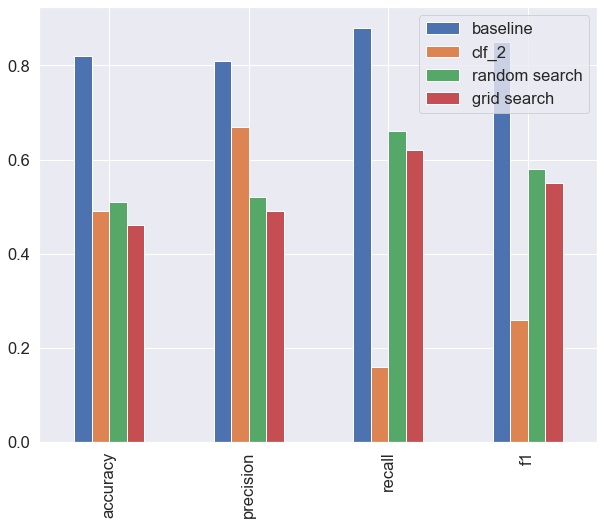

In [202]:
compare_metrics  = pd.DataFrame({ "baseline": baseline_metrics,
                                 "clf_2": clf_2_metrics,
                                 "random search": rs_metrics,
                                 "grid search": gs_metrics})
compare_metrics.plot.bar(figsize=(10,8));

## Saving and loading trained Machine learning Model
Two ways
1. With a python's `pickle` module
2. With `joblib` module  

## pickles

In [203]:
import pickle
#Save a exixting model file
pickle.dump(gs_clf,open("gs_random_forest_model1.pkl","wb"))

In [205]:
#load a save model
loaded_pickle_model  = pickle.load(open("gs_random_forest_model1.pkl", "rb"))

In [206]:
# Make prediction
pickle_y_preds = loaded_pickle_model.predict(X_test)
evaluate_preds(y_test,pickle_y_preds)

Acc:45.90%
precision:0.49
recall:0.62
f1:0.55


{'accuracy': 0.46, 'precision': 0.49, 'recall': 0.62, 'f1': 0.55}

## joblib

In [207]:
from joblib import dump ,load

dump(gs_clf,filename=open("gs_random_forest_model1.joblib", "wb"))

In [208]:
loaded_joblib_model = load(open("gs_random_forest_model1.joblib","rb"))

In [209]:
joblib_y_preds = loaded_joblib_model.predict(X_test)
evaluate_preds(y_test,joblib_y_preds)

Acc:45.90%
precision:0.49
recall:0.62
f1:0.55


{'accuracy': 0.46, 'precision': 0.49, 'recall': 0.62, 'f1': 0.55}

### Putting it all together

In [210]:
data  = pd.read_csv("data/car-sales-extended-missing-data.csv")
data

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [213]:
data.dtypes

Make              object
Colour            object
Odometer (KM)    float64
Doors            float64
Price            float64
dtype: object

In [216]:
data.isna().sum(
)

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

# Steps we are gonna do
1. Fill the missing Data
2. Convert Data to Numbers
3. Building a model on data

In [264]:
# Getting Data Ready 
from sklearn.compose import ColumnTransformer
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
# Modelling
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV ,train_test_split
# set up random seed
import numpy as np
np.random.seed(42)
# import data and deop row with missing data
data = pd.read_csv("data/car-sales-extended-missing-data.csv")
data.dropna(subset=["Price"],inplace = True)
## Different features and  transformer pipeline 
categorical_features  = ["Make","Colour"]
categorical_transformer = Pipeline(steps=[
    ("imputer",SimpleImputer(strategy="constant",fill_value="missing")),
    ("onehot",OneHotEncoder(handle_unknown="ignore"))]) 
0
door_features = ["Doors"]
door_transformer = Pipeline(steps=[
    ("imputer",SimpleImputer(strategy="constant",fill_value=4)),
        
])

numeric_features = ["Odometer (KM)"]
numeric_transformer = Pipeline(steps=[
    ("imputers",SimpleImputer(strategy="mean"))
])

In [285]:
# fill miss value and convert into number
preprocessor  = ColumnTransformer(
                              transformers=[
                                  ("categorical",categorical_transformer,categorical_features),
                                  ("Doors",door_transformer,door_features),
                                  ("numerical",numeric_transformer,numeric_features)
                                  
                              ])

# Creating a preprocessing and modeling pipeline
model = Pipeline(steps=[("preprocessor", preprocessor),
                       ("regressor",RandomForestRegressor())])


#split the data
X = data.drop("Price",axis= 1)
y = data["Price"]

X_train , X_test, y_train, y_test = train_test_split(X,y, test_size= 0.2)

model.fit(X_train, y_train)
model.score(X_test, y_test)

0.33012697822721004